# Initial Data Processing 

## Loading in the data

In [22]:
import kagglehub
import pandas as pd
import os
import shutil
from pathlib import Path
import numpy as np

In [23]:
path = Path("../data/raw/Mall_Customers_Enhanced.csv")
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,Male,19,15,39,18-25,11.10,456,3,Budget
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
2,3,Female,20,16,6,18-25,15.36,594,2,Budget
3,4,Female,23,16,77,18-25,7.79,300,6,Luxury
4,5,Female,31,17,40,26-35,12.47,480,5,Budget


In [24]:
print("Shape of the data:", df.shape)

print("Info: ", df.info())

print("Missing values:\n", df.isnull().sum())

Shape of the data: (200, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Age Group               196 non-null    object 
 6   Estimated Savings (k$)  200 non-null    float64
 7   Credit Score            200 non-null    int64  
 8   Loyalty Years           200 non-null    int64  
 9   Preferred Category      200 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 15.8+ KB
Info:  None
Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    

## Missing values

there are 4 missing values in "Age Group" so we will input the correct label based on Age bins.

In [25]:
df["Age Group"].unique()

array(['18-25', '26-35', '51-65', '65+', '36-50', nan], dtype=object)

In [26]:
age_bins = [17, 25, 35, 50, 65, 120]
age_labels = ["18-25", "26-35", "36-50", "51-65", "65+"]

df.loc[df["Age Group"].isna(), "Age Group"] = pd.cut(
    df.loc[df["Age Group"].isna(), "Age"],
    bins=age_bins,
    labels=age_labels,
    right=True
)
df["Age Group"] = df["Age Group"].astype("category")

print(df["Age Group"].isna().sum())
print(df["Age Group"].value_counts())

0
Age Group
36-50    62
26-35    60
18-25    38
51-65    28
65+      12
Name: count, dtype: int64


## Data Type Optimization

In [27]:
for col in ["Gender", "Age Group", "Preferred Category"]:
    df[col] = df[col].astype("category")

df["CustomerID"] = df["CustomerID"].astype("int32")
df["Age"] = df["Age"].astype("int32")
df["Annual Income (k$)"] = df["Annual Income (k$)"].astype("int32")
df["Spending Score (1-100)"] = df["Spending Score (1-100)"].astype("int32")
df["Credit Score"] = df["Credit Score"].astype("int32")
df["Loyalty Years"] = df["Loyalty Years"].astype("int32")

df["Estimated Savings (k$)"] = df["Estimated Savings (k$)"].astype("float32")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int32   
 1   Gender                  200 non-null    category
 2   Age                     200 non-null    int32   
 3   Annual Income (k$)      200 non-null    int32   
 4   Spending Score (1-100)  200 non-null    int32   
 5   Age Group               200 non-null    category
 6   Estimated Savings (k$)  200 non-null    float32 
 7   Credit Score            200 non-null    int32   
 8   Loyalty Years           200 non-null    int32   
 9   Preferred Category      200 non-null    category
dtypes: category(3), float32(1), int32(6)
memory usage: 6.7 KB


In [28]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0
Age Group,200,5,36-50,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated Savings (k$),200.0,NaN,NaN,NaN,40.247948,21.333448,6.46,28.799999,36.41,44.967499,120.559998
Credit Score,200.0,NaN,NaN,NaN,743.68,155.176727,300.0,697.0,833.0,850.0,850.0
Loyalty Years,200.0,NaN,NaN,NaN,5.93,1.570808,2.0,5.0,6.0,7.0,9.0
Preferred Category,200,4,Electronics,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print(df.duplicated().sum())

0


In [30]:
df = df.drop(columns=["CustomerID"])

Dropping the ID since it's not useful in clustering. No duplicates. Lets move on to outliers.

## Outliers

In [31]:
numeric_cols = df.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
Annual Income (k$): 2 outliers
Spending Score (1-100): 0 outliers
Estimated Savings (k$): 26 outliers
Credit Score: 20 outliers
Loyalty Years: 0 outliers


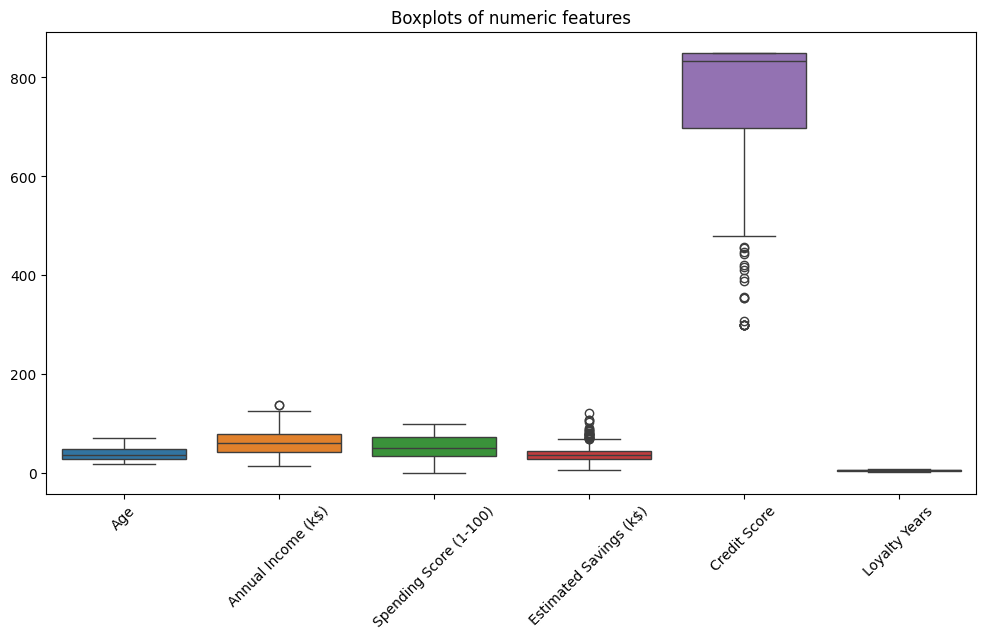

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of numeric features")
plt.show()

Some outliers are very high earners and so some have much higher savings. Credit score outlier indicate unusually low scores compared to main cluster. We will be keeping these, since clustering customers could showcase different groups like "High Saver" or "VIP Earner".

In [33]:
df.to_csv("../data/processed/mall_customers_cleaned.csv", index=False)